Clase
- healthy
- blight
- mold

In [1]:
import PIL.Image
import PIL.ImageDraw
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np

- dimensiunea pozelor
- cate poze in fiecare clasa

In [4]:
path = pathlib.Path("data")

In [5]:
data = []
for cat_dir in path.iterdir():
    for im_path in cat_dir.iterdir():
        with PIL.Image.open(im_path) as im:
            data.append((str(im_path), im_path.parent.name, im.size[0], im.size[1]))
df = pd.DataFrame(
    data,
    columns=["path", "category", "width", "height"],
)
df

,path,category,width,height
0,data/healthy/2e875abf-377c-4663-a406-e02984215...,healthy,256,256
1,data/healthy/148e32de-8876-45d9-92c5-43c17d729...,healthy,256,256
2,data/healthy/6e970455-6b05-4c23-82e0-ce913197f...,healthy,256,256
3,data/healthy/90af034e-dedd-4edf-afb7-9449c4508...,healthy,256,256
4,data/healthy/dbbde73f-e630-4799-9a08-37bd5602f...,healthy,256,256
...,...,...,...,...
3538,data/leaf-mold/4badfb88-91f8-49e0-baad-553c18b...,leaf-mold,256,256
3539,data/leaf-mold/6371bae8-f9d4-4b4c-88d7-96de89c...,leaf-mold,256,256
3540,data/leaf-mold/ec76173b-c354-4711-9bb7-b38dae1...,leaf-mold,256,256
3541,data/leaf-mold/55aaf81e-1a23-419c-9b20-a24f5ab...,leaf-mold,256,256


In [6]:
(
    df.groupby("category").count()
)

,path,width,height
category,,,
early-blight,1000,1000,1000
healthy,1591,1591,1591
leaf-mold,952,952,952


In setul de date nu avem un numar egal de poze din fiecare clasa. Vom folosi undersampling pentru a aduce numarul de poze din fiecare clasa la 952.

Apoi pozele ramase vor fi impartite astfel:
- 15% evaluation
- 15% test
- 70% train

In [14]:
df_resampled = df.groupby("category").head(952)
df_resampled.groupby("category").count()

,path,width,height
category,,,
early-blight,952,952,952
healthy,952,952,952
leaf-mold,952,952,952


Exemplu de frunza

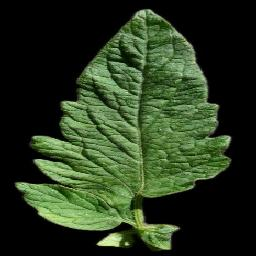

In [15]:
PIL.Image.open(df_resampled.iloc[0]["path"])

array([[<Axes: title={'center': 'width'}>]], dtype=object)

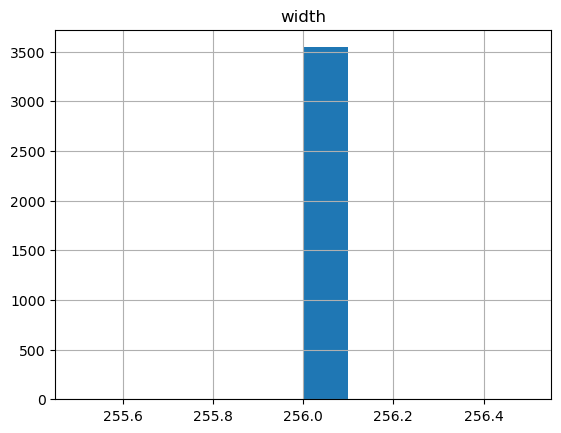

In [7]:
df.hist("width")

array([[<Axes: title={'center': 'height'}>]], dtype=object)

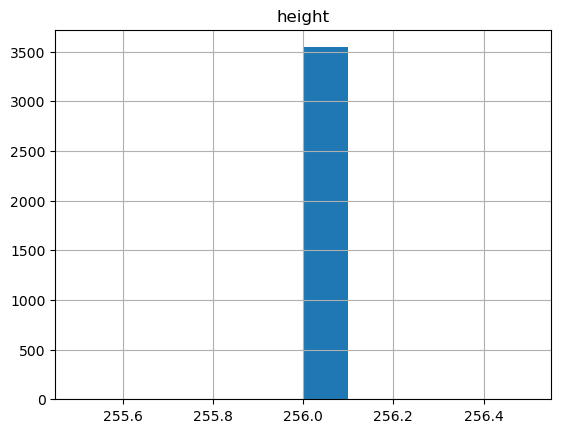

In [8]:
df.hist("height")

Toate pozele au dimensiune de 256x256.